In [5]:
import pandas as pd

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'

df = pd.read_csv(file_path)

print(df)


     ObjectId                       Country ISO2 ISO3  \
0           1  Afghanistan, Islamic Rep. of   AF  AFG   
1           2                       Albania   AL  ALB   
2           3                       Algeria   DZ  DZA   
3           4                American Samoa   AS  ASM   
4           5      Andorra, Principality of   AD  AND   
..        ...                           ...  ...  ...   
220       221                Western Sahara   EH  ESH   
221       222                         World  NaN  WLD   
222       223                Yemen, Rep. of   YE  YEM   
223       224                        Zambia   ZM  ZMB   
224       225                      Zimbabwe   ZW  ZWE   

                                             Indicator            Unit  \
0    Temperature change with respect to a baseline ...  Degree Celsius   
1    Temperature change with respect to a baseline ...  Degree Celsius   
2    Temperature change with respect to a baseline ...  Degree Celsius   
3    Temperature ch

In [20]:
import pandas as pd


file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'

df = pd.read_csv(file_path)

print(df.columns)


Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')


In [6]:
import pandas as pd

# DATAPATH
csv_file_path = "/kaggle/input/climate-change-indicators/climate_change_indicators.csv"

df = pd.read_csv(csv_file_path)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CHECK MISSING VALUES
print("Missing Values:")
print(df.isnull().sum())

# PRINT UNIQUE VALUES FOR CATEGORICAL COLUMNS
print("\nUnique Values for Categorical Columns:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

Missing Values:
ObjectId     0
Country      0
ISO2         0
ISO3         0
Indicator    0
            ..
F2018        0
F2019        0
F2020        0
F2021        0
F2022        0
Length: 72, dtype: int64

Unique Values for Categorical Columns:
Country: ['Afghanistan, Islamic Rep. of' 'Albania' 'Algeria'
 'Andorra, Principality of' 'Angola' 'Anguilla' 'Argentina' 'Australia'
 'Austria' 'Bahamas, The' 'Bahrain, Kingdom of' 'Bangladesh' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Rep.' 'Chad' 'Chile' 'China, P.R.: Hong Kong'
 'China, P.R.: Macao' 'China, P.R.: Mainland' 'Colombia'
 'Congo, Dem. Rep. of the' 'Cook Islands' 'Cuba' 'Cyprus' 'Denmark'
 'Dominica' 'Dominican Rep.' 'Ecuador' 'Egypt, Arab Rep. of' 'El Salvador'
 'Eswatini, Kingdom of' 'Faroe Islands' 'Fiji, Rep. of' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia, The' 'Germany' 'Ghana' '

In [10]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'
df = pd.read_csv(file_path)

# MELT THE DATAFRAME TO LONG FORMAT FOR BETTER PLOTTING 
df_melted = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Temperature')

# BUILD A HILL PLOT 
fig = px.area(df_melted, x='Year', y='Temperature', line_group='Country', color='Country',
              labels={'Temperature': 'Temperature Change', 'Year': 'Year'})

# UPDATELAYOUT FOR BETTER LOOK
fig.update_layout(title='Temperature Change Over the Years',
                  xaxis_title='Year',
                  yaxis_title='Temperature Change',
                  legend_title='Country')


fig.show()


In [13]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'
df = pd.read_csv(file_path)



# MELT THE DATAFRAME TO LONG FORMAT FOR BETTER PLOTTING 
df_melted = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Temperature')

# EXTRACT THE YEAR AND HANDLE NAN VALUES
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(float)
df_melted['Year'] = df_melted['Year'].fillna(0)  
df_melted['Year'] = df_melted['Year'].astype(int)

# FILTER DATA FOR THE YEARS 2010 TO PRESENT 
df_filtered = df_melted[df_melted['Year'] >= 2010]

# BUILD A FOREST PLOT 
fig = px.bar(df_filtered, x='Temperature', y='Country', orientation='h', color='Temperature',
             labels={'Temperature': 'Temperature Change', 'Country': 'Country'})


fig.update_layout(title='Temperature Change by Country (2010 to Present)',
                  xaxis_title='Temperature Change',
                  yaxis_title='Country')


fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
import pandas as pd
import plotly.express as px

# DATAPATH
file_path = '/kaggle/input/climate-change-indicators/climate_change_indicators.csv'
df = pd.read_csv(file_path)

# MELT THE DATAFRAME TO LONG FORMAT FOR BETTER PLOTTING
df_melted = pd.melt(df, id_vars=['Country', 'Unit'], var_name='Year', value_name='Temperature')

# EXTRACT THE YEAR AND HANDLE NaN VALUES
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(float)
df_melted['Year'] = df_melted['Year'].fillna(0)  
df_melted['Year'] = df_melted['Year'].astype(int)

# FILTER DATA FOR THE YEARS 2010 TO PRESENT
df_filtered = df_melted[df_melted['Year'] >= 2010]

# BUILD JUNGLE PLOT USING PLOTLY EXPRESS
fig = px.scatter(df_filtered, x='Year', y='Country', color='Unit', symbol='Unit',
                 hover_data={'Unit': True, 'Temperature': True, 'Country': True},
                 labels={'Temperature': 'Temperature', 'Country': 'Country'},
                 title='Temperature Units by Country Over the Years')


fig.update_layout(xaxis_title='Year')


fig.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# DATAPATH
csv_file_path = "/kaggle/input/climate-change-indicators/climate_change_indicators.csv"

df = pd.read_csv(csv_file_path)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CONVERT CATEGORICAL TO NUMERIC
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

# HANDLING OUTLIERS USING Z SCORE
z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
df = df[~outlier_rows]

# NORMALIZE AND SCALE
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# PRINT THE UPDATED DATAFRAME
print(df)


# SPLITTING INTO FEATURES AND TARGET
X = df.drop(columns=['Unit'])  # Features
y = df['Unit']  # Target

# SPLITTING INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PRINTING SHAPES OF THE RESULTING DATAFRAMES
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


     ObjectId   Country      ISO2      ISO3  Indicator  Unit  Source  \
0   -1.706135 -1.720983 -1.676571 -1.720983        0.0   0.0     0.0   
1   -1.690575 -1.698777 -1.632158 -1.654365        0.0   0.0     0.0   
2   -1.675015 -1.676571 -0.921559 -0.921559        0.0   0.0     0.0   
4   -1.643895 -1.654365 -1.720983 -1.632158        0.0   0.0     0.0   
5   -1.628334 -1.632158 -1.609952 -1.698777        0.0   0.0     0.0   
..        ...       ...       ...       ...        ...   ...     ...   
218  1.685987  1.632158  1.654365  1.654365        0.0   0.0     0.0   
219  1.701547  1.654365  0.899353  0.899353        0.0   0.0     0.0   
220  1.717107  1.676571 -0.854940 -0.854940        0.0   0.0     0.0   
223  1.763788  1.698777  1.698777  1.698777        0.0   0.0     0.0   
224  1.779348  1.720983  1.720983  1.720983        0.0   0.0     0.0   

     CTS_Code  CTS_Name  CTS_Full_Descriptor  ...     F2013     F2014  \
0         0.0       0.0                  0.0  ...  1.292076 -1

2024-02-25 10:14:18.040838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 10:14:18.041241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 10:14:18.186399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
4/4 - 1s - loss: 0.0322 - val_loss: 0.0245 - 1s/epoch - 356ms/step
Epoch 2/50
4/4 - 0s - loss: 0.0212 - val_loss: 0.0221 - 42ms/epoch - 10ms/step
Epoch 3/50
4/4 - 0s - loss: 0.0165 - val_loss: 0.0192 - 41ms/epoch - 10ms/step
Epoch 4/50
4/4 - 0s - loss: 0.0130 - val_loss: 0.0166 - 43ms/epoch - 11ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0100 - val_loss: 0.0156 - 41ms/epoch - 10ms/step
Epoch 6/50


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



4/4 - 0s - loss: 0.0104 - val_loss: 0.0143 - 62ms/epoch - 16ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0119 - val_loss: 0.0144 - 27ms/epoch - 7ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0068 - val_loss: 0.0142 - 43ms/epoch - 11ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0064 - val_loss: 0.0128 - 42ms/epoch - 10ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0084 - val_loss: 0.0108 - 44ms/epoch - 11ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0051 - val_loss: 0.0086 - 45ms/epoch - 11ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0064 - val_loss: 0.0076 - 54ms/epoch - 14ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0048 - val_loss: 0.0076 - 46ms/epoch - 12ms/step
Epoch 14/50
4/4 - 0s - loss: 0.0048 - val_loss: 0.0076 - 51ms/epoch - 13ms/step
Epoch 15/50
4/4 - 0s - loss: 0.0037 - val_loss: 0.0082 - 29ms/epoch - 7ms/step
Epoch 16/50
4/4 - 0s - loss: 0.0037 - val_loss: 0.0091 - 43ms/epoch - 11ms/step
Epoch 17/50
4/4 - 0s - loss: 0.0047 - val_loss: 0.0099 - 29ms/epoch - 7ms/step
Epoch 18/50
4/4 - 0s - loss: 0.0040 - val_loss: 0.0106 - 2

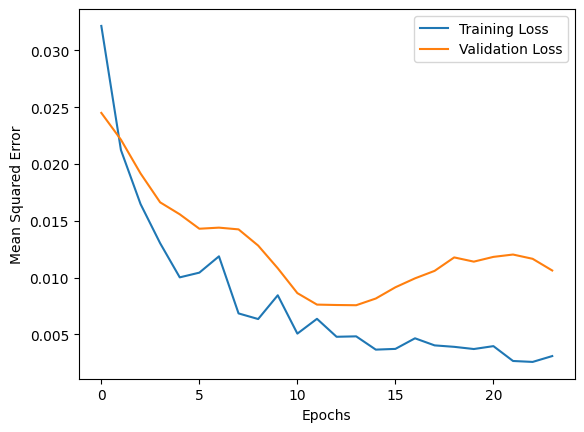

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# DATAPATH
csv_file_path = "/kaggle/input/climate-change-indicators/climate_change_indicators.csv"

# DATA PATH
df = pd.read_csv(csv_file_path)

#DATA PREPROCESSING 
def preprocess_data(df):
    # REMOVE DUPLICATE ROWS
    df.drop_duplicates(inplace=True)

    # DROP ROWS WITH MISSING VALUES
    df.dropna(inplace=True)

    # CONVERT CATEGORICAL TO NUMERIC
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include='object').columns
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

    # HANDLING OUTLIERS USING Z SCORE
    z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
    abs_z_scores = abs(z_scores)
    outlier_rows = (abs_z_scores > 3).all(axis=1)
    df = df[~outlier_rows]

    # NORMALIZE AND SCALE
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])

    return df

# AAPPLY DATA PREPROCESS
df = preprocess_data(df)

# SPLITTING INTO FEATURES AND TARGET
X = df.drop(columns=['Unit'])  # Features
y = df['Unit']  # Target

# SPLITTING INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RESHAPE THE INPUT DATA TO BE 3D FOR LSTM 
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

#MODEL TRAINING WITH EARLY STOPPING  
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint], verbose=2)

# MY BEST MODEL
best_model = Sequential()
best_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
best_model.add(Dropout(0.2))
best_model.add(Dense(units=1))
best_model.compile(optimizer='adam', loss='mse')
best_model.load_weights('best_model.h5')

# MAKE PREDICTION
y_pred = best_model.predict(X_test)

# EVALUATE THE MODEL
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')




plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
